<a href="https://colab.research.google.com/github/DanielMesaB/Integracion-y-prospectiva-de-datos-2025-01/blob/main/Copia_de_Copia_de_Muestreo_de_variables_aleatorias_montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Se procede con la carga de las librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Para conectar directamente con el drive
from google.colab import drive
drive.mount('/content/drive')

#Libreria para números aleatorios
import random as rnd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


hh

1.
Se procede con la carga del archivo de trabajo
** Descripción de las variables **
Esta base de datos de eventos de pérdida, poseeen dos variables:

1-Frecuencia: Indica el número de eventos de pérdida por periodo ( Semana, día, mes)

2-Severidad: Indica el costo de cada evento de pérdida

Las perdidas esperadas son:
 9.45111269614836
Las perdidas no esperadas son:
 4.85836049807418
El valor de la poliza de aseguramiento:
 0.2656083


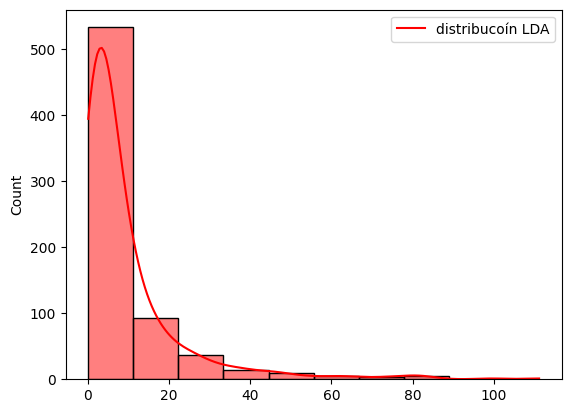

In [ ]:
nxl='/content/drive/MyDrive/FALLASOFICIAL.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB.head(100)

Xf=XDB.iloc[:,3]
Xs=XDB.iloc[:,4]
LDA=Xf*Xs

u=np.mean(LDA) #Limite superior pérdidas esperadas ( Zona 1 de la gráfica )
OpVar= np.percentile(LDA,0.999) # Valor Asegurado OpVar ( Zona 3 de la gráfica )
PNE=(u+OpVar)/2 # Pérdidas esperadas ( Zona 2 de la gráfica)

print("Las perdidas esperadas son:\n",u)
print("Las perdidas no esperadas son:\n",PNE)
print("El valor de la poliza de aseguramiento:\n",OpVar)

plt.figure()
sns.histplot(LDA,bins=10,kde=True,color='Red')
plt.legend(['distribucoín LDA'])



In [ ]:
counts,bin_edges=np.histogram(LDA,bins=10)
LI=bin_edges[:-1]  # Limites nferiores
LS= bin_edges[1:]
mc=LI+LS
pdf=counts/sum(counts) # Nos entrega la F relativa
# % de datos por intervalo
cdf=np.cumsum(pdf) # El acumulado de las probabilidades )
df=pd.DataFrame(np.column_stack((LI,LS,mc,pdf,cdf)))
df.columns=['LI','LS','mc','pdf','cdf']
df.head(10)



,LI,LS,mc,pdf,cdf
0,0.14230,11.23637,11.37867,0.760342,0.760342
1,11.23637,22.33044,33.56681,0.132668,0.893010
2,22.33044,33.42451,55.75495,0.052782,0.945792
3,33.42451,44.51858,77.94309,0.019971,0.965763
4,44.51858,55.61265,100.13123,0.012839,0.978602
5,55.61265,66.70672,122.31937,0.007133,0.985735
6,66.70672,77.80079,144.50751,0.004280,0.990014
7,77.80079,88.89486,166.69565,0.007133,0.997147
8,88.89486,99.98893,188.88379,0.001427,0.998573
9,99.98893,111.08300,211.07193,0.001427,1.000000


In [ ]:
df.head

3. Se procede con el muestreo de la variable a una confiabilidad del 99%

Se han truncado las últimas 5000 líneas del flujo de salida.
[False False False  True  True  True  True  True  True  True]
El intervalo de trabajo es: 3
Los limites inferiores son: 
 [ 0.1423  11.23637 22.33044 33.42451 44.51858 55.61265 66.70672 77.80079
 88.89486 99.98893]
El intervalo seleccionado es:
 33.42450999999999
El valor muestreado es: [42.73831161]
Interación: 616
El aleatorio es: 0.49125146091992444
La lista de números es:
 [0.76034237 0.89300999 0.94579173 0.9657632  0.978602   0.98573466
 0.99001427 0.99714693 0.99857347 1.        ]
[ True  True  True  True  True  True  True  True  True  True]
El intervalo de trabajo es: 0
Los limites inferiores son: 
 [ 0.1423  11.23637 22.33044 33.42451 44.51858 55.61265 66.70672 77.80079
 88.89486 99.98893]
El intervalo seleccionado es:
 0.1423
El valor muestreado es: [4.71982791]
Interación: 617
El aleatorio es: 0.12810858135718817
La lista de números es:
 [0.76034237 0.89300999 0.94579173 0.9657632  0.978602   0.98573466
 0.99001427

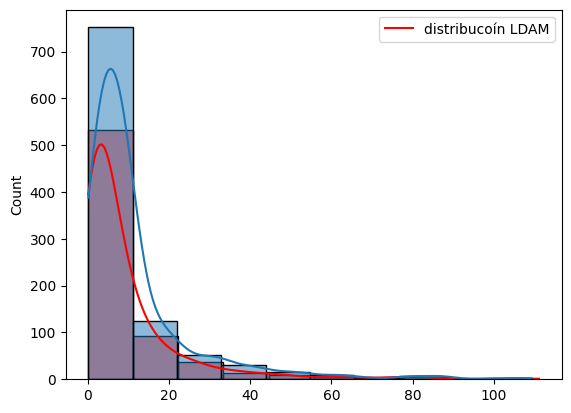

In [ ]:
TI=LS[0]-LI[0]

#Confiabilidad del 99% - 100 datos
LDAm=np.zeros((1000,1))

for i in range (1000):
  print("Interación:",i)
  aleatorio=rnd.random()
  print("El aleatorio es:", aleatorio)
  print("La lista de números es:\n",cdf)
  print((aleatorio<cdf))
  Intervalo=np.array(np.where(aleatorio<cdf))
  print("El intervalo de trabajo es:",Intervalo[0,0])
  print("Los limites inferiores son: \n", LI)
  aleatorio2=rnd.random()
  print("El intervalo seleccionado es:\n",LI[Intervalo[0,0]])
  LDAm[i]=LI[Intervalo[0,0]]+TI*aleatorio2
  print("El valor muestreado es:",LDAm[i])

plt.figure()
sns.histplot(LDA,bins=10,kde=True,color='Red')
plt.legend(['distribución LDA'])
sns.histplot(LDAm,bins=10,kde=True,color='green')
plt.legend(['distribución LDA'])
plt.show()




Análisis de resultados
La base de datos utilizada para este estudio posee un total de 701 datos de eventos de riesgos semanales en transacciones fallidas, en una entidad Fintech. ( Lo macro ). Los datos presentaron una desviación tal, asi como un coeficiente de asimetria tal y coeficiente de curtosis tal. ( Lo macro ).
Luego del muestreo a 3 confiabilidades del 99% ( 100 ) , 99.9% ( 1000 ) , 99.99% ( 10000 ), los valores de asimetria encontrados para cada confiabilidad fueron:
cas100, cas1000, cas10000, muy similares o diferentes a los valores de los datos originales, cual coeficiente de asimetria fue más parecido al de los datos originales. esto mismo se debe de hacer para el coeficiente de curtosis.
Tanto los datos originales como los datos muestreados responden de acuerdo con su coeficiente de asimetria y su coeficiente de curtosis a distribuciones tales y tales.
Es importante mencionar que si los coeficientes de asimetria fueron positivos, esto es indicador de perdidas esperadas mucho más altas y pérdidas catastroficas mucho menores ( OpVar ).



